In [23]:
import numpy as np    
import pandas as pd   
# this is main branch
# this is 3rd main commit 

In [24]:
from sklearn.datasets import make_blobs
x,y = make_blobs(n_samples=1000, n_features=3, centers=2,random_state=23)
x.shape
df = pd.DataFrame(x)
df.shape

(1000, 3)

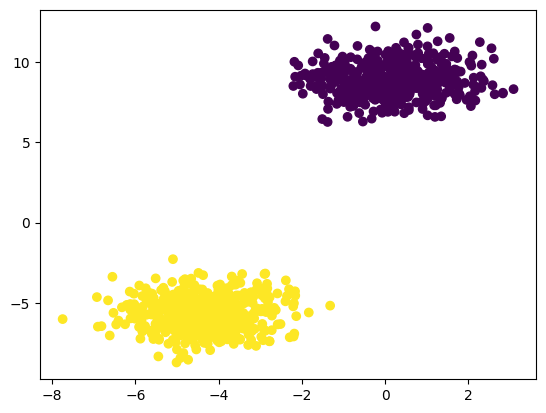

In [25]:
from matplotlib import pyplot as plt
#from sklearn.decomposition import PCA
#pca = PCA(n_components=2)
#x = pca.fit_transform(x)
plt.scatter(x[:,0], x[:,1], c=y)

In [27]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=['object','category']) #object is for string , category is for pandas object 

In [28]:
categorical_columns_with_more_than_3_unique_values = []
categorical_columns_with_till_3_unique_values = []

for i in categorical_columns: 
    if df[i].nunique()>3: 
        categorical_columns_with_more_than_3_unique_values.append(i)  
    else: 
        categorical_columns_with_till_3_unique_values.append(i) 

print(categorical_columns_with_more_than_3_unique_values)
print(categorical_columns_with_till_3_unique_values)

df.drop(columns=categorical_columns_with_more_than_3_unique_values, inplace=True)

[]
[]


In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df,y,test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((800, 3), (200, 3), (800,), (200,))

ordinal = rank matter     be, phd, 12th             (ordinal encoder)
nominal = rank not matter                 male, female   (labelEncoder)

one not encoding for multivariable columns 
for now we are just dropping the columns with more than 3 variable 


In [30]:
from sklearn.compose import ColumnTransformer, make_column_transformer  #takes list of tuples 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split 

ohe = OneHotEncoder(drop='first', sparse_output=False)
le = LabelEncoder()
oe = OrdinalEncoder()
si_mean = SimpleImputer(strategy='mean')
si_mf = SimpleImputer(strategy='most_frequent')
mms = MinMaxScaler()

steps_categorical = [
            ('imputer_mf', si_mf),
            ('ohe', ohe),     
]

steps_numerical = [
            ('imputer_mean', si_mean),
            ('mms', mms)
]

c:\Users\pubg3\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\pubg3\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\pubg3\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\pubg3\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a m

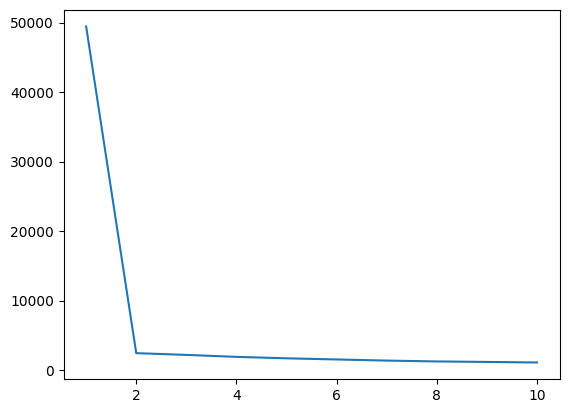

In [44]:
from tkinter import N
from sklearn.cluster import KMeans


wcss = []
for i in range(1,11):
    Km = KMeans(n_clusters=i)
    Km.fit(x_train)
    
    wcss.append(Km.inertia_)

plt.plot(range(1,11), wcss)

In [45]:
km = KMeans(n_clusters=2)


In [32]:
from sklearn.pipeline import Pipeline

pipe_numerical = Pipeline(steps_numerical)
pipe_categorical = Pipeline(steps_categorical)


In [33]:
ct = ColumnTransformer(
        [   
            ('pipe_numerical', pipe_numerical, numeric_columns),
            ('pipe_categorical', pipe_categorical, categorical_columns_with_till_3_unique_values)
        ],
        remainder='passthrough'
    )
ct.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_numerical',
                                 Pipeline(steps=[('imputer_mean',
                                                  SimpleImputer()),
                                                 ('mms', MinMaxScaler())]),
                                 Index([0, 1, 2], dtype='int64')),
                                ('pipe_categorical',
                                 Pipeline(steps=[('imputer_mf',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 [])])

In [34]:
steps_ct_model = Pipeline([
    ('ct', ct),
    ('model', km)
])
steps_ct_model

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_numerical',
                                                  Pipeline(steps=[('imputer_mean',
                                                                   SimpleImputer()),
                                                                  ('mms',
                                                                   MinMaxScaler())]),
                                                  Index([0, 1, 2], dtype='int64')),
                                                 ('pipe_categorical',
                                                  Pipeline(steps=[('imputer_mf',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  [])])),
                ('model', KMeans(n_clusters=2))])

In [55]:
rf_prams = {
    'model__criterion' : ['gini', 'entropy', 'log_loss'],
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__max_features': ['auto', 'sqrt', 'log2']
}
km_params = {
    'model__init': ['k-means++', 'random'],
    'model__n_init': [10, 20, 30],
    'model__max_iter': [300, 400, 500],
    'model__tol': [1e-4, 1e-3, 1e-2]
}


In [56]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

gs = GridSearchCV(steps_ct_model, param_grid= km_params, n_jobs=-1)
gs.fit(x_train, y_train)
gs.best_params_, gs.best_score_

c:\Users\pubg3\.conda\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


({'model__init': 'k-means++',
  'model__max_iter': 300,
  'model__n_init': 10,
  'model__tol': 0.0001},
 -4.915888880256704)

In [51]:
!pip install kneed

In [54]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')
kl.elbow

2

In [57]:
ypred = gs.best_estimator_.predict(x_test)
ypred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1])

In [70]:
x_test

,0,1,2
521,-0.743937,8.508627,6.257620
737,-0.627505,8.402741,6.678293
740,0.105249,7.809477,6.560070
660,-3.903941,-6.483588,4.955608
411,0.674451,8.442068,5.517880
...,...,...,...
408,-3.076114,-3.772860,3.452411
332,0.231261,6.908704,4.059071
208,-5.066064,-6.060857,3.740109
613,-3.215625,-4.330217,4.101168


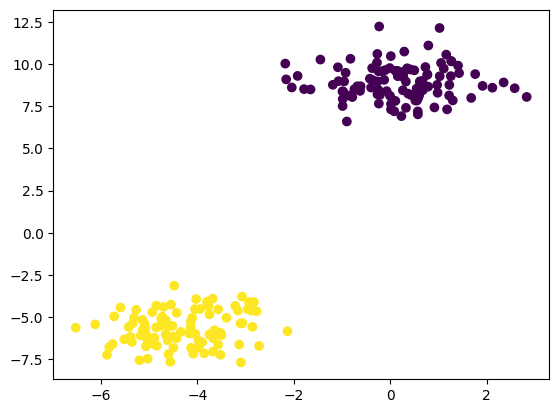

In [65]:
plt.scatter(x_test[0], x_test[1], c=ypred)

In [58]:
from sklearn.metrics import accuracy_score

gs_pred = gs.best_estimator_.predict(x_test)
accuracy_score(y_test, gs_pred)

1.0